# Linear Regression Task

# 1. data visualization & cleaning

In [188]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import pickle

In [328]:
np.__version__


'2.1.3'

In [334]:
import sklearn

In [336]:
sklearn.__version__

'1.5.2'

In [ ]:
df = pd.read_csv("FuelConsumption (1) - FuelConsumption (1).csv.csv")

In [190]:
df.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [191]:
df.isnull().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# heatmap

In [193]:
numeric_df = df.select_dtypes(include=['number'])

In [194]:
numeric_df

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,2000,1.6,4,10.5,216
1,2000,1.6,4,9.8,205
2,2000,3.2,6,13.7,265
3,2000,3.5,6,15.0,301
4,2000,1.8,4,11.4,230
...,...,...,...,...,...
634,2000,2.4,5,14.4,288
635,2000,2.4,5,13.6,274
636,2000,2.3,5,13.9,274
637,2000,2.3,5,13.0,260


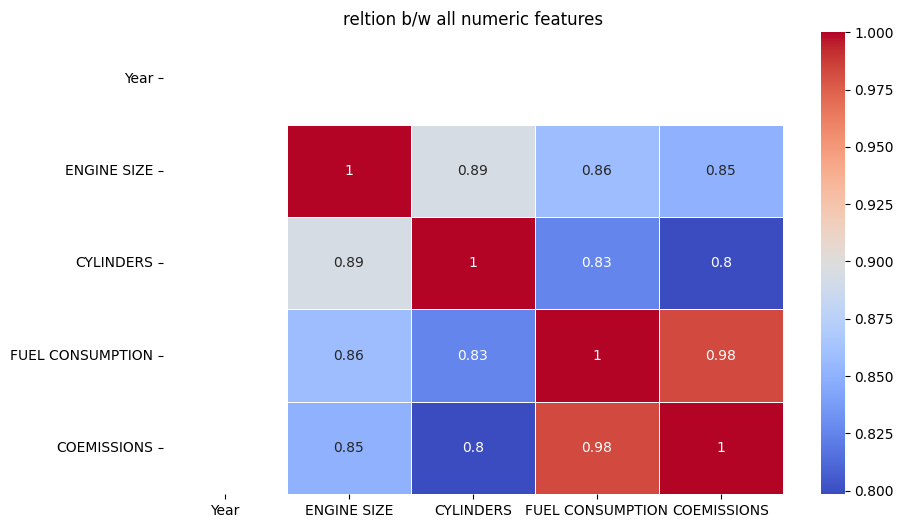

In [195]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('reltion b/w all numeric features')
plt.show()

clearly, as the year feature is having a constant value 2000 for all entries & is having no relation with any other feature, dropping it

In [196]:
df = df.drop(columns=['Year'])

all other features are having a strong correlation with each other & also with the targeted feature(FUEL CONSUMPTION)=so they will contribute in predicting output when implementing linear regression

# outliers

In [197]:
def detect_outliers(feature) :
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature]<lower_bound) | (df[feature]>upper_bound)]
    return outliers

In [198]:
detect_outliers('ENGINE SIZE')

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
207,DODGE,VIPER GTS,SUBCOMPACT,8.0,10,M6,Z,21.4,396
208,DODGE,VIPER RT/10,SUBCOMPACT,8.0,10,M6,Z,21.4,396


In [199]:
detect_outliers('CYLINDERS')

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
50,BMW,750iL,FULL-SIZE,5.4,12,A5,Z,19.1,373
207,DODGE,VIPER GTS,SUBCOMPACT,8.0,10,M6,Z,21.4,396
208,DODGE,VIPER RT/10,SUBCOMPACT,8.0,10,M6,Z,21.4,396
211,FERRARI,456 MGT,SUBCOMPACT,5.5,12,A4,Z,26.7,513
212,FERRARI,456 MGT,SUBCOMPACT,5.5,12,M6,Z,26.3,495
213,FERRARI,456 MGTA,SUBCOMPACT,5.5,12,A4,Z,26.7,513
214,FERRARI,456 MGTA,SUBCOMPACT,5.5,12,M6,Z,26.3,495
215,FERRARI,550 MARANELLO,SUBCOMPACT,5.5,12,M6,Z,30.2,582
433,MERCEDES-BENZ,SL 600,SUBCOMPACT,6.0,12,A5,Z,20.1,393


In [200]:
detect_outliers('FUEL CONSUMPTION')

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
209,FERRARI,360 MODENA F1,TWO-SEATER,3.6,8,AS6,Z,24.6,474
210,FERRARI,360 MODENA F1,TWO-SEATER,3.6,8,M6,Z,24.1,472
211,FERRARI,456 MGT,SUBCOMPACT,5.5,12,A4,Z,26.7,513
212,FERRARI,456 MGT,SUBCOMPACT,5.5,12,M6,Z,26.3,495
213,FERRARI,456 MGTA,SUBCOMPACT,5.5,12,A4,Z,26.7,513
214,FERRARI,456 MGTA,SUBCOMPACT,5.5,12,M6,Z,26.3,495
215,FERRARI,550 MARANELLO,SUBCOMPACT,5.5,12,M6,Z,30.2,582
328,HONDA,INSIGHT,SUBCOMPACT,1.0,3,M5,X,4.9,104


In [201]:
detect_outliers('COEMISSIONS')

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
211,FERRARI,456 MGT,SUBCOMPACT,5.5,12,A4,Z,26.7,513
212,FERRARI,456 MGT,SUBCOMPACT,5.5,12,M6,Z,26.3,495
213,FERRARI,456 MGTA,SUBCOMPACT,5.5,12,A4,Z,26.7,513
214,FERRARI,456 MGTA,SUBCOMPACT,5.5,12,M6,Z,26.3,495
215,FERRARI,550 MARANELLO,SUBCOMPACT,5.5,12,M6,Z,30.2,582
328,HONDA,INSIGHT,SUBCOMPACT,1.0,3,M5,X,4.9,104


In [202]:
# removing outliers
indices_to_drop = [50,207,208,209,210,211,212,213,214,215,328,433]

In [203]:
df = df.drop(indices_to_drop)

In [204]:
df = df.reset_index(drop=True)

# 2.Implementing Linear Regression

In [205]:
# seperating independent & dependent features
y = df['FUEL CONSUMPTION'] # target
x = df.drop(columns=['FUEL CONSUMPTION'])

In [206]:
x

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,COEMISSIONS
0,ACURA,1.6EL,COMPACT,1.6,4,A4,X,216
1,ACURA,1.6EL,COMPACT,1.6,4,M5,X,205
2,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,265
3,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,301
4,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,230
...,...,...,...,...,...,...,...,...
622,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,288
623,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,274
624,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,274
625,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,260


In [207]:
df['FUEL'].unique()

array(['X', 'Z', 'E', 'N', 'D'], dtype=object)

In [208]:
y

0      10.5
1       9.8
2      13.7
3      15.0
4      11.4
       ... 
622    14.4
623    13.6
624    13.9
625    13.0
626    14.7
Name: FUEL CONSUMPTION, Length: 627, dtype: float64

In [209]:
from sklearn.model_selection import train_test_split
# splitting dataset into training & testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=42)
# 70% data given to training set & remaining 30% given to test set
# random_state controls shuffling applied to data before applying the split, setting it to a fixed no like 42 here ensures split will be same every time code is run(reproducible)

In [210]:
x_train

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,COEMISSIONS
570,VOLKSWAGEN,CABRIO,SUBCOMPACT,2.0,4,A4,X,253
88,CHEVROLET,CAMARO,SUBCOMPACT,5.7,8,M6,Z,285
524,SUZUKI,VITARA CONVERTIBLE 4X4,SUV,1.6,4,M5,X,228
117,CHEVROLET,NEW C1500 TAHOE,SUV,4.8,8,A4,X,391
419,MERCEDES-BENZ,S 430,FULL-SIZE,4.3,8,A5,Z,304
...,...,...,...,...,...,...,...,...
71,CHEVROLET,ASTRO AWD PASSENGER,VAN - PASSENGER,4.3,6,A4,X,359
106,CHEVROLET,K1500 SILVERADO 4X4,PICKUP TRUCK - STANDARD,4.8,8,A4,X,366
270,GMC,C1500 SIERRA,PICKUP TRUCK - STANDARD,4.8,8,A4,X,334
435,NISSAN,PATHFINDER 4X4,SUV,3.3,6,A4,X,361


In [211]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438 entries, 570 to 102
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAKE           438 non-null    object 
 1   MODEL          438 non-null    object 
 2   VEHICLE CLASS  438 non-null    object 
 3   ENGINE SIZE    438 non-null    float64
 4   CYLINDERS      438 non-null    int64  
 5   TRANSMISSION   438 non-null    object 
 6   FUEL           438 non-null    object 
 7   COEMISSIONS    438 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 30.8+ KB


In [212]:
# seperating numerical & categorical features
numerical_features = x_train.select_dtypes(include=['int64','float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns

In [213]:
numerical_features

Index(['ENGINE SIZE', 'CYLINDERS', 'COEMISSIONS'], dtype='object')

In [214]:
categorical_features

Index(['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL'], dtype='object')

# standardizing the numerical columns

In [215]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # initialization

In [216]:
x_train_num_scaled = pd.DataFrame(scaler.fit_transform(x_train[numerical_features]), columns=numerical_features, index=x_train.index)
x_test_num_scaled = pd.DataFrame(scaler.transform(x_test[numerical_features]), columns=numerical_features, index=x_test.index)

In [217]:
x_train_num_scaled

,ENGINE SIZE,CYLINDERS,COEMISSIONS
570,-1.036877,-1.181059,-0.683661
88,2.107514,1.520266,-0.155047
524,-1.376811,-1.181059,-1.096642
117,1.342662,1.520266,1.595990
419,0.917745,1.520266,0.158818
...,...,...,...
71,0.917745,0.169604,1.067375
106,1.342662,1.520266,1.183009
270,1.342662,1.520266,0.654395
435,0.067909,0.169604,1.100413


# encoding categorical columns

In [218]:
x_train[categorical_features].nunique()

MAKE              35
MODEL            265
VEHICLE CLASS     14
TRANSMISSION       7
FUEL               4
dtype: int64

one hot encoding for columns with less no of categories

In [219]:
# columns for OHE
one_hot_columns = ['VEHICLE CLASS', 'TRANSMISSION', 'FUEL']

In [220]:
x_train[one_hot_columns]

,VEHICLE CLASS,TRANSMISSION,FUEL
570,SUBCOMPACT,A4,X
88,SUBCOMPACT,M6,Z
524,SUV,M5,X
117,SUV,A4,X
419,FULL-SIZE,A5,Z
...,...,...,...
71,VAN - PASSENGER,A4,X
106,PICKUP TRUCK - STANDARD,A4,X
270,PICKUP TRUCK - STANDARD,A4,X
435,SUV,A4,X


In [221]:
from sklearn.preprocessing import OneHotEncoder

In [222]:
# initialize OHE
one_hot_encoder = OneHotEncoder(handle_unknown='ignore') # removed(drop first to avoid multicollinearity) & 
# prevent error if new category appear in test data

In [223]:
x_train_encoded = one_hot_encoder.fit_transform(x_train[one_hot_columns]).toarray()

In [224]:
x_test_encoded = one_hot_encoder.transform(x_test[one_hot_columns]).toarray()

In [225]:
x_train_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [226]:
x_test_encoded

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [227]:
# converting into df 
x_train_encoded = pd.DataFrame(x_train_encoded, index=x_train.index, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))
x_test_encoded = pd.DataFrame(x_test_encoded, index=x_test.index, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))

In [228]:
x_train_encoded

,VEHICLE CLASS_COMPACT,VEHICLE CLASS_FULL-SIZE,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_MINICOMPACT,VEHICLE CLASS_MINIVAN,VEHICLE CLASS_PICKUP TRUCK - SMALL,VEHICLE CLASS_PICKUP TRUCK - STANDARD,VEHICLE CLASS_STATION WAGON - MID-SIZE,VEHICLE CLASS_STATION WAGON - SMALL,VEHICLE CLASS_SUBCOMPACT,...,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_M5,TRANSMISSION_M6,FUEL_D,FUEL_E,FUEL_X,FUEL_Z
570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
419,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
106,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
270,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


frequency encoding for columns with high no of categories

In [229]:
# 'MAKE'
x_train['MAKE_freq'] = x_train['MAKE'].map(x_train['MAKE'].value_counts(normalize=True))
x_test['MAKE_freq'] = x_test['MAKE'].map(x_train['MAKE'].value_counts(normalize=True)) # using train data count to ensure consistency

In [230]:
# 'MODEL'
x_train['MODEL_freq'] = x_train['MODEL'].map(x_train['MODEL'].value_counts(normalize=True))
x_test['MODEL_freq'] = x_test['MODEL'].map(x_train['MODEL'].value_counts(normalize=True))

In [326]:
x_test['MODEL_freq'] = x_test['MODEL_freq'].fillna(0)

# CONCATINATING STANDARDIZED & ENCODED DATA

In [232]:
# dropping original categorical columns
x_train = x_train.drop(columns=categorical_features)
x_test = x_test.drop(columns=categorical_features)

In [233]:
x_train = pd.concat([x_train, x_train_encoded], axis=1)
x_test = pd.concat([x_test, x_test_encoded], axis=1)

In [234]:
# dropping original numerical columns
x_train_scaled = x_train.drop(columns=numerical_features)
x_test_scaled = x_test.drop(columns=numerical_features)

In [235]:
x_train_scaled = pd.concat([x_train, x_train_num_scaled], axis=1)
x_test_scaled = pd.concat([x_test, x_test_num_scaled], axis=1)

In [236]:
x_train_scaled

,ENGINE SIZE,CYLINDERS,COEMISSIONS,MAKE_freq,MODEL_freq,VEHICLE CLASS_COMPACT,VEHICLE CLASS_FULL-SIZE,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_MINICOMPACT,VEHICLE CLASS_MINIVAN,...,TRANSMISSION_AS5,TRANSMISSION_M5,TRANSMISSION_M6,FUEL_D,FUEL_E,FUEL_X,FUEL_Z,ENGINE SIZE,CYLINDERS,COEMISSIONS
570,2.0,4,253,0.054795,0.004566,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.036877,-1.181059,-0.683661
88,5.7,8,285,0.091324,0.006849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.107514,1.520266,-0.155047
524,1.6,4,228,0.025114,0.006849,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.376811,-1.181059,-1.096642
117,4.8,8,391,0.091324,0.002283,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.342662,1.520266,1.595990
419,4.3,8,304,0.031963,0.002283,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.917745,1.520266,0.158818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.3,6,359,0.091324,0.002283,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.917745,0.169604,1.067375
106,4.8,8,366,0.091324,0.009132,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.342662,1.520266,1.183009
270,4.8,8,334,0.057078,0.009132,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.342662,1.520266,0.654395
435,3.3,6,361,0.034247,0.002283,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.067909,0.169604,1.100413


In [237]:
x_test_scaled

,ENGINE SIZE,CYLINDERS,COEMISSIONS,MAKE_freq,MODEL_freq,VEHICLE CLASS_COMPACT,VEHICLE CLASS_FULL-SIZE,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_MINICOMPACT,VEHICLE CLASS_MINIVAN,...,TRANSMISSION_AS5,TRANSMISSION_M5,TRANSMISSION_M6,FUEL_D,FUEL_E,FUEL_X,FUEL_Z,ENGINE SIZE,CYLINDERS,COEMISSIONS
580,1.8,4,225,0.054795,0.002283,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.206844,-1.181059,-1.146199
590,1.9,4,192,0.054795,0.002283,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.121860,-1.181059,-1.691333
550,2.0,4,258,0.068493,0.002283,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.036877,-1.181059,-0.601065
213,4.2,6,389,0.093607,0.002283,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.832761,0.169604,1.562951
485,2.3,4,260,0.009132,0.004566,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.781926,-1.181059,-0.568027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2.4,4,235,0.091324,0.004566,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.696943,-1.181059,-0.981007
411,3.2,6,262,0.031963,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.017074,0.169604,-0.534989
68,5.7,8,430,0.006849,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.107514,1.520266,2.240239
15,2.8,6,292,0.031963,0.006849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.357008,0.169604,-0.039412


In [238]:
x_test_scaled['MODEL_freq'].isnull().sum()

np.int64(0)

In [239]:
from sklearn.linear_model import LinearRegression

In [240]:
# cross validation (internally dividing train data into multipe train set and then cross validating each which will give different accuracies for each and then doing mean of it to find output)
from sklearn.model_selection import cross_val_score

In [241]:
regression = LinearRegression()
regression.fit(x_train_scaled, y_train)

LinearRegression()

In [242]:
mse = cross_val_score(regression, x_train_scaled, y_train, scoring='neg_mean_squared_error',cv=10)

In [243]:
mse

array([-0.06376148, -0.0558199 , -0.06515804, -0.11225059, -0.0716797 ,
       -0.10196986, -0.0738882 , -0.09932236, -0.07767904, -0.09327976])

In [244]:
np.mean(mse)

np.float64(-0.08148089182264477)

In [245]:
# next step - prediction
reg_pred = regression.predict(x_test_scaled)

In [246]:
reg_pred

array([11.19717542,  8.06247703, 12.11759237, 19.08868152, 12.9897076 ,
       17.30837106, 15.42390447, 18.7947755 , 16.08067338, 13.72395164,
       11.66654268, 14.53212683, 13.3122996 , 11.68752852,  9.08978865,
       17.03290928, 13.76610655, 18.78513966, 16.99811364, 16.03213412,
       11.97434032, 13.44913225, 15.79399437, 13.72892729, 10.14553649,
       13.20816001, 11.89186899, 12.1985462 , 14.41592085, 15.37689551,
       14.45423624, 12.600952  , 10.09950466, 17.02327343, 14.13847899,
       13.02298468, 10.64397396, 13.06734633, 19.19851722, 11.35832031,
       16.36801518, 13.69994518, 13.27797033, 17.62267228, 12.47909267,
       15.44940173, 13.38849257, 15.6413925 , 17.96022639, 16.1597988 ,
       21.94690111, 11.08824523, 11.09260959, 13.4866345 , 14.12241924,
       18.11126628, 13.47980923, 14.87945949, 18.68973018, 12.9392021 ,
       12.14814445, 11.94868482, 15.74017928, 14.45966809, 10.95762221,
       14.37004606, 13.90786468, 13.5580463 , 12.75474599, 10.05

In [247]:
y_test.index

Index([580, 590, 550, 213, 485, 235, 453,  77, 529, 145,
       ...
       248, 511, 220, 153,  75,  92, 411,  68,  15, 199],
      dtype='int64', length=189)

In [248]:
reg_pred.shape

(189,)

In [249]:
y_test.shape

(189,)

In [250]:
reg_pred.dtype

dtype('float64')

In [251]:
y_test.dtype

dtype('float64')

In [252]:
reg_pred = reg_pred.astype('float32')

In [253]:
y_test = y_test.astype('float32')

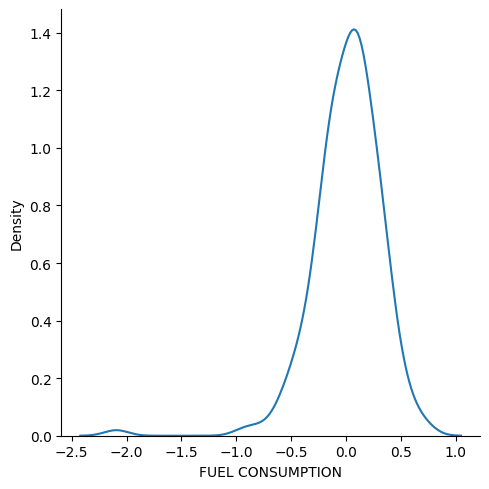

In [254]:
# to check if the prediction is correct, we will compare it with our truth value that is y_test 
sns.displot(reg_pred-y_test,kind='kde')

In [255]:
from sklearn.metrics import r2_score

In [256]:
score = r2_score(reg_pred, y_test)

In [257]:
score

0.9895695447921753

In [258]:
mse_lr = mean_squared_error(reg_pred, y_test)

In [259]:
mse_lr

np.float32(0.09717136)

# implementing knn

In [260]:
from sklearn.neighbors import KNeighborsRegressor

In [261]:
knn = KNeighborsRegressor(n_neighbors=1)

In [262]:
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=1)

In [263]:
knn.score(x_test_scaled, y_test)

0.9559800699562974

In [264]:
pred = knn.predict(x_test_scaled)

In [265]:
pred

array([11.2,  8.1, 12.2, 19.1, 13. , 17. , 15.2, 18.7, 16.5, 13.9, 12.1,
       15. , 13.6, 12.1,  9.1, 17. , 13.4, 18.7, 17. , 16.3, 11.9, 13.3,
       15.4, 13.9, 10.6, 13. , 12. , 12.2, 14.4, 16.2, 14.5, 12.6,  9.8,
       17. , 20.6, 13. , 11.3, 13.4, 18.9, 11.2, 15.9, 13.9, 13.5, 17.8,
       12.6, 15. , 13.4, 15.2, 17.7, 15.7, 22.3, 10.6, 10.6, 13.4, 14.7,
       18.4, 13.3, 15.1, 18.2, 13.1, 11.9, 11.8, 15.4, 14.6, 11.1, 14.3,
       14. , 13.2, 12.3, 10.3,  9.8, 15.3, 16.7, 16.8, 17.9, 12.5, 13.1,
       17. , 17.9, 15.3, 17.8, 13.4, 12.1, 14.9, 19.1,  8.1, 14.5, 13.4,
       12.5, 16. , 15.5, 22.3, 12.1, 21.5, 20.6, 12.2, 17.3, 13.4, 11.7,
       12.1, 22.3, 13.4, 13.1, 13.2, 16.2, 17.9, 18.2, 21.2, 13.4, 18.1,
       13.5,  8.7, 16.2, 17.6, 18.3, 18.9, 11.9, 11.2, 15.6, 20.2, 13.5,
       11.8, 13.1, 10.5, 15.1, 12.2, 11.7, 10.6, 17. ,  9.1, 13.1, 16.2,
       10.3,  9.8, 17.3, 13.9, 13.4, 17.4, 18. , 13.8, 15.3, 13.9, 13. ,
       17.7,  9.8, 15.2, 14.5, 17.9,  8.8, 15.5, 15

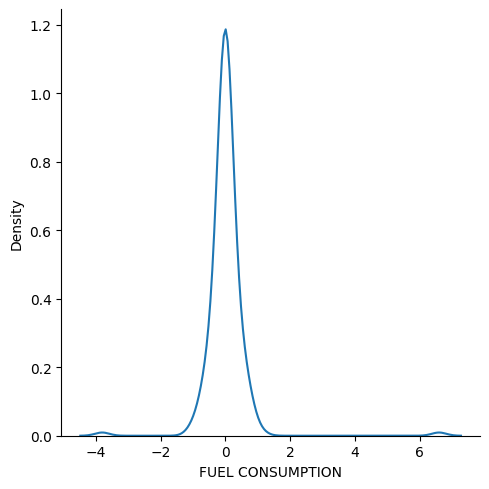

In [266]:
# to check if the prediction is correct, we will compare it with our truth value that is y_test 
sns.displot(pred-y_test,kind='kde')

In [267]:
score_knn = r2_score(pred, y_test)

In [268]:
score_knn

0.9564510687415267

hyperparameter tuning ---

In [269]:
param_grid = {'n_neighbors': range(1, 20)}

In [270]:
from sklearn.model_selection import GridSearchCV

In [271]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2')

In [272]:
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=1),
             param_grid={'n_neighbors': range(1, 20)}, scoring='r2')

In [273]:
grid_search.best_params_

{'n_neighbors': 1}

In [274]:
grid_search.best_score_

np.float64(0.9654348619307506)

In [275]:
# fitting the model with best parameters
knn_best = KNeighborsRegressor(n_neighbors=1)

In [276]:
knn_best.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=1)

In [277]:
pred_best = knn_best.predict(x_test_scaled)

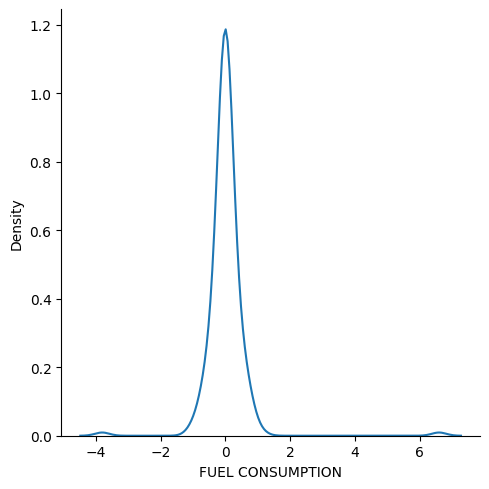

In [278]:
# to check if the prediction is correct, we will compare it with our truth value that is y_test 
sns.displot(pred_best-y_test,kind='kde')

In [279]:
r2_knn = r2_score(pred_best, y_test)

In [280]:
r2_knn

0.9564510687415267

although k=1 comes out to be the best value and results in high r2 score, it can lead to overfitting as it indicates that the model performs best when considering only the closest neighbor to predict the target value.Also dataset being small KNN with n_neighbors=1 might perform better because it doesn't average across neighbors.

In [281]:
mse_knn = mean_squared_error(y_test,pred_best)

In [282]:
mse_knn

np.float64(0.41111107901938027)

# implementing decision trees

In [283]:
from sklearn.tree import DecisionTreeRegressor

In [284]:
dt = DecisionTreeRegressor()

In [285]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [286]:
y_train_pred = dt.predict(x_train)

In [287]:
y_pred_dt = dt.predict(x_test)

In [288]:
r2_score(y_train, y_train_pred)

1.0

In [289]:
r2_dt = r2_score(y_test, y_pred_dt)

In [290]:
r2_dt

0.9773781763792817

In [291]:
mse_dt = mean_squared_error(y_test, y_pred_dt)

In [292]:
mse_dt

np.float64(0.21126981139830453)

# implementing random forests

In [293]:
from sklearn.ensemble import RandomForestRegressor

In [294]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [327]:
x_train

,ENGINE SIZE,CYLINDERS,COEMISSIONS,MAKE_freq,MODEL_freq,VEHICLE CLASS_COMPACT,VEHICLE CLASS_FULL-SIZE,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_MINICOMPACT,VEHICLE CLASS_MINIVAN,...,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_M5,TRANSMISSION_M6,FUEL_D,FUEL_E,FUEL_X,FUEL_Z
570,2.0,4,253,0.054795,0.004566,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
88,5.7,8,285,0.091324,0.006849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
524,1.6,4,228,0.025114,0.006849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
117,4.8,8,391,0.091324,0.002283,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
419,4.3,8,304,0.031963,0.002283,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.3,6,359,0.091324,0.002283,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
106,4.8,8,366,0.091324,0.009132,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
270,4.8,8,334,0.057078,0.009132,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
435,3.3,6,361,0.034247,0.002283,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [295]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [296]:
y_pred_rf = rf.predict(x_test)

In [297]:
r2_rf = r2_score(y_test, y_pred_rf)

In [298]:
r2_rf

0.9845750223491572

In [299]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [300]:
mse_rf

np.float64(0.14405700326175339)

hyperparameter tuning for random forests ---

In [301]:
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [302]:
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=10, scoring='r2')

In [303]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             scoring='r2')

In [304]:
grid_search_rf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [305]:
grid_search_rf.best_score_

np.float64(0.9862430914520681)

In [306]:
# fitting model with best params
rf_best = RandomForestRegressor(max_depth= 10,min_samples_leaf= 1,min_samples_split= 2,n_estimators= 200)

In [307]:
rf_best.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [308]:
y_pred_rf_best = rf_best.predict(x_test)

In [309]:
y_pred_rf_best

array([11.18901746,  8.6195    , 12.3260375 , 19.13771429, 13.05923852,
       17.20687641, 15.10230884, 18.79218617, 15.822375  , 13.84876468,
       11.74197704, 14.59666995, 13.40550166, 11.55778338,  9.044     ,
       16.88647708, 13.28487596, 18.79628844, 17.06766994, 16.30956878,
       11.93394053, 13.41042811, 15.46165495, 13.75447814, 10.12023956,
       13.43409048, 11.92868763, 11.9292312 , 14.39931985, 15.86431698,
       14.55594316, 12.5379408 ,  9.99075238, 16.87747708, 14.07018847,
       13.08690169, 10.72952857, 13.25942797, 18.90717237, 11.22911048,
       16.37098589, 13.81953146, 13.68941991, 17.57991667, 12.32761254,
       15.01074025, 13.36611622, 15.63882045, 17.68176815, 15.86051129,
       22.025     , 10.79524762, 10.89942024, 13.36586206, 13.91896123,
       17.6857253 , 13.32001545, 14.91117159, 18.52620655, 13.07934995,
       12.00241448, 11.96181609, 15.64030796, 14.55798382, 10.81212679,
       14.38641894, 13.94549265, 13.30342202, 12.58387175, 10.19

In [310]:
custom = x_test.head(1)

In [311]:
custom

,ENGINE SIZE,CYLINDERS,COEMISSIONS,MAKE_freq,MODEL_freq,VEHICLE CLASS_COMPACT,VEHICLE CLASS_FULL-SIZE,VEHICLE CLASS_MID-SIZE,VEHICLE CLASS_MINICOMPACT,VEHICLE CLASS_MINIVAN,...,TRANSMISSION_A4,TRANSMISSION_A5,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_M5,TRANSMISSION_M6,FUEL_D,FUEL_E,FUEL_X,FUEL_Z
580,1.8,4,225,0.054795,0.002283,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [312]:
import numpy as np
arr = np.array(custom)

In [313]:
pd.DataFrame(arr)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.8,4.0,225.0,0.054795,0.002283,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [314]:
custom.ndim

2

In [315]:
rf_best.predict(custom)

array([11.18901746])

In [316]:
rf_best.predict(x_test.head(1))

array([11.18901746])

In [317]:
r2_rf = r2_score(y_test, y_pred_rf_best)

In [318]:
r2_rf

0.9847994939397462

In [319]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [320]:
mse_rf

np.float64(0.14405700326175339)

In [321]:
with open("model.pkl", "wb") as files:
    pickle.dump(rf_best, files)

In [322]:
with open("scaler.pkl", "wb") as files:
    pickle.dump(scaler, files)

In [323]:
with open("encoder.pkl", "wb") as files:
    pickle.dump(one_hot_encoder, files)